# Intel image classification

## Imports

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import cv2
from sklearn.utils import shuffle
from tqdm import tqdm

### Defining class names for the dataset

In [3]:
class_names = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
class_names_label = {class_name:i for i, class_name in enumerate(class_names)}
image_size = (150, 150)

### Function to load the images and labels from the dataset

In [4]:
def load_data():
    
    datasets = ['C:/Users/Peetu/Documents/data science/intel image data/seg_train/seg_train',
                'C:/Users/Peetu/Documents/data science/intel image data/seg_test/seg_test']
    output = []
    
    # Iterate through training and test sets
    for dataset in datasets:
        images=[]
        labels=[]
        
        # Iterate through each folder corresponding to a category
        for folder in os.listdir(dataset):
            label=class_names_label[folder]
            
            # Iterate through each image in the folder
            for file in tqdm(os.listdir(os.path.join(dataset, folder))):
                
                # Get the path name of the image
                img_path=os.path.join(os.path.join(dataset, folder), file)
                
                # Open and resize the img
                image=cv2.imread(img_path)
                image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                image=cv2.resize(image, image_size) 
                
                # Append image and label to the output
                images.append(image)
                labels.append(label)
                
        images=np.array(images, dtype='uint8')
        labels=np.array(labels, dtype='int32')
        output.append((images, labels))

    return output

In [5]:
(train_images, train_labels), (test_images, test_labels) = load_data()

100%|██████████| 501/501 [00:01<00:00, 251.85it/s]


## Exploring the data

In [6]:
train_images.shape

(14034, 150, 150, 3)

In [7]:
train_labels

array([0, 0, 0, ..., 5, 5, 5])

In [8]:
test_images.shape

(3000, 150, 150, 3)

In [9]:
test_labels

array([0, 0, 0, ..., 5, 5, 5])

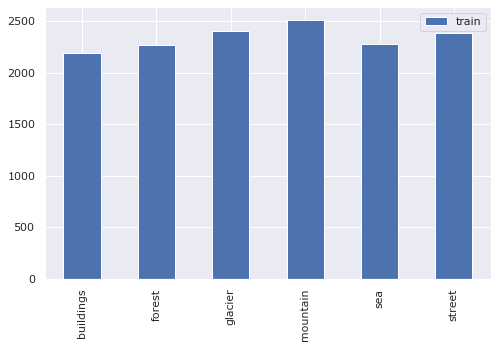

In [11]:
sns.set()
plt.rcParams['font.family'] = 'Verdana'
_,train_count = np.unique(train_labels, return_counts = True)
pd.DataFrame({'train': train_count}, index = class_names).plot.bar(figsize=(8,5))
plt.show()

## Preprocessing the data

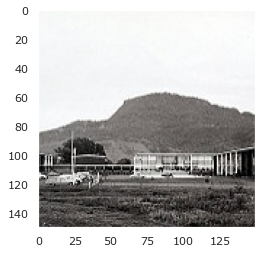

In [12]:
plt.figure()
plt.imshow(train_images[0])
plt.grid(False)
plt.show()

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### Plotting 25 random images with their corresponding labels from the dataset

In [14]:
def display_images(class_names, train_images, train_labels):
    plt.figure(figsize=(12,12))
    
    shuffle = list(zip(train_images, train_labels))
    random.shuffle(shuffle)
    train_images, train_labels = zip(*shuffle)
    
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(train_images[i], cmap=plt.cm.binary)
        plt.xlabel(class_names[train_labels[i]])
plt.show()

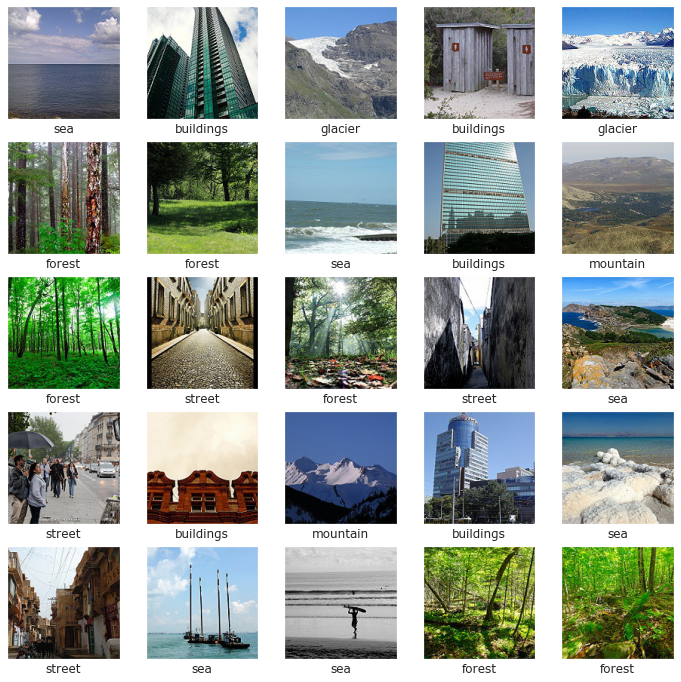

In [15]:
display_images(class_names, train_images, train_labels)

## Building the model

### Setting up layers

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)), 
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [22]:
model.layers

### Compiling the model

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Training the model

#### Shuffling training data before passing it in to the model

In [24]:
train_images, train_labels = shuffle(train_images, train_labels, random_state=20)

#### Feeding the model the training dataset

In [25]:
history = model.fit(train_images, train_labels, epochs=10, shuffle=True, validation_split = 0.3)

Train on 9823 samples, validate on 4211 samples
Epoch 1/10
9823/9823 [==============================] - 133s 14ms/sample - loss: 1.0326 - acc: 0.6027 - val_loss: 0.7845 - val_acc: 0.6994
Epoch 2/10
9823/9823 [==============================] - 128s 13ms/sample - loss: 0.6615 - acc: 0.7618 - val_loss: 0.7398 - val_acc: 0.7231
Epoch 3/10
9823/9823 [==============================] - 127s 13ms/sample - loss: 0.4842 - acc: 0.8297 - val_loss: 0.7333 - val_acc: 0.7483
Epoch 4/10
9823/9823 [==============================] - 126s 13ms/sample - loss: 0.2945 - acc: 0.8998 - val_loss: 0.7064 - val_acc: 0.7739
Epoch 5/10
9823/9823 [==============================] - 128s 13ms/sample - loss: 0.1718 - acc: 0.9436 - val_loss: 0.8116 - val_acc: 0.7713
Epoch 6/10
9823/9823 [==============================] - 128s 13ms/sample - loss: 0.0999 - acc: 0.9690 - val_loss: 0.8527 - val_acc: 0.7875
Epoch 7/10
9823/9823 [==============================] - 124s 13ms/sample - loss: 0.0694 - acc: 0.9790 - val_loss: 1.03

#### Plotting model accuracy and loss on the training and validation datasets

In [26]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


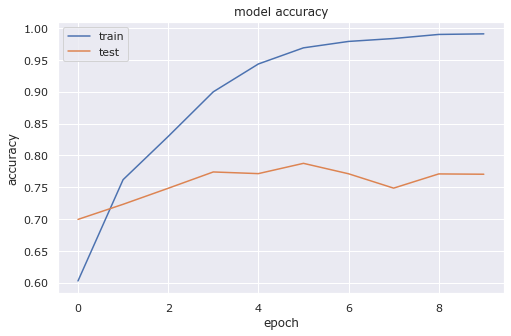

In [27]:
# Accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

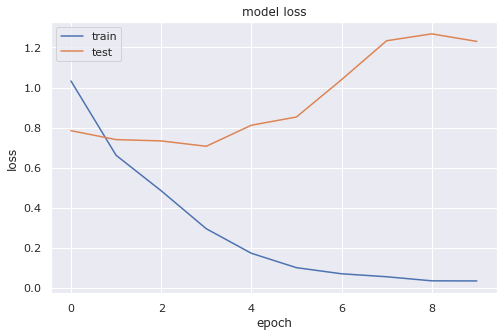

In [28]:
# Loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

We can clearly see overfitting in the model.

### Evaluating the model

In [29]:
test_loss = model.evaluate(test_images,  test_labels)

3000/3000 [==============================] - 15s 5ms/sample - loss: 1.1939 - acc: 0.7727


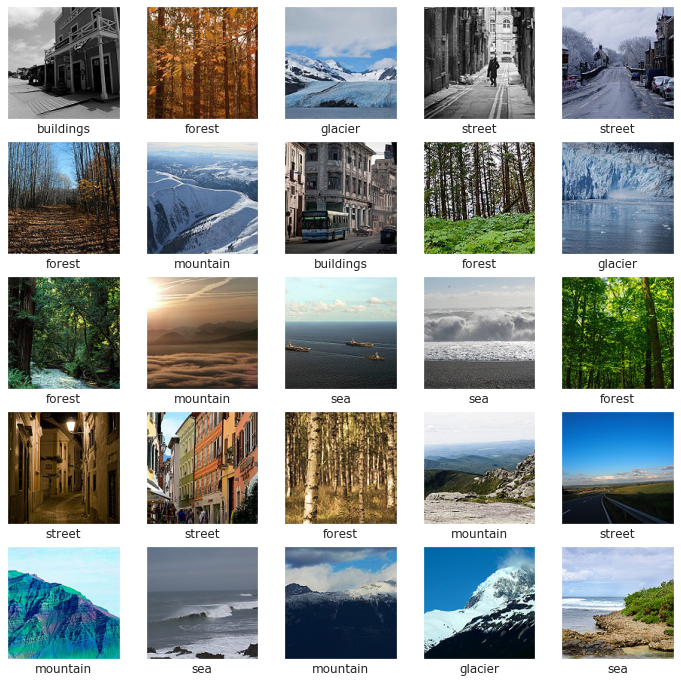

In [30]:
display_images(class_names, test_images, test_labels)

The model has an accuracy of 77.2% and seems to be doing pretty well with the test images. We could further improve accuracy by doing image augmentation.

### Making predictions

In [31]:
test_images, test_labels = shuffle(test_images, test_labels, random_state=20)

In [32]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [33]:
predictions = probability_model.predict(test_images)

In [34]:
predictions[0]

array([0.12956256, 0.12956274, 0.12956256, 0.12956256, 0.12956256,
       0.35218704], dtype=float32)

In [35]:
np.argmax(predictions[0])

5

In [36]:
test_labels[0]

5